In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('dataset.csv')
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0              1    Male   19                  15                      39   
1              2    Male   21                  15                      81   
2              3  Female   20                  16                       6   
3              4  Female   23                  16                      77   
4              5  Female   31                  17                      40   
...          ...     ...  ...                 ...                     ...   
1495        1496  Female   32                  25                      38   
1496        1497    Male   33                  34                      47   
1497        1498  Female   39                 122                      86   
1498        1499  Female   46                  28                      47   
1499        1500    Male   65                  92                      35   

      cluster      Customer rating  
0           1  Low Value Customers  
1           3  High value Customer  
2           1  Low Value Customers  
3           3  High value Customer  
4           1  Low Value Customers  
...       ...                  ...  
1495        1  Low Value Customers  
1496        1  Low Value Customers  
1497        4       Lost Customers  
1498        1  Low Value Customers  
1499        5       Lost Customers  

[1500 rows x 7 columns]

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1500 non-null   int64 
 1   Gender                  1500 non-null   object
 2   Age                     1500 non-null   int64 
 3   Annual Income (k$)      1500 non-null   int64 
 4   Spending Score (1-100)  1500 non-null   int64 
 5   cluster                 1500 non-null   int64 
 6   Customer rating         1500 non-null   object
dtypes: int64(5), object(2)
memory usage: 82.2+ KB


In [5]:
df.describe()

CustomerID          Age  Annual Income (k$)  Spending Score (1-100)  \
count  1500.000000  1500.000000         1500.000000             1500.000000   
mean    750.500000    39.714000           81.576000               55.418667   
std     433.157015    11.936409           38.582526               25.536734   
min       1.000000    18.000000           15.000000                1.000000   
25%     375.750000    29.000000           48.000000               35.000000   
50%     750.500000    40.000000           78.000000               56.000000   
75%    1125.250000    49.000000          116.000000               76.000000   
max    1500.000000    70.000000          150.000000              100.000000   

          cluster  
count  1500.00000  
mean      2.37800  
std       1.70168  
min       0.00000  
25%       1.00000  
50%       2.00000  
75%       4.00000  
max       5.00000

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
cluster                   0
Customer rating           0
dtype: int64

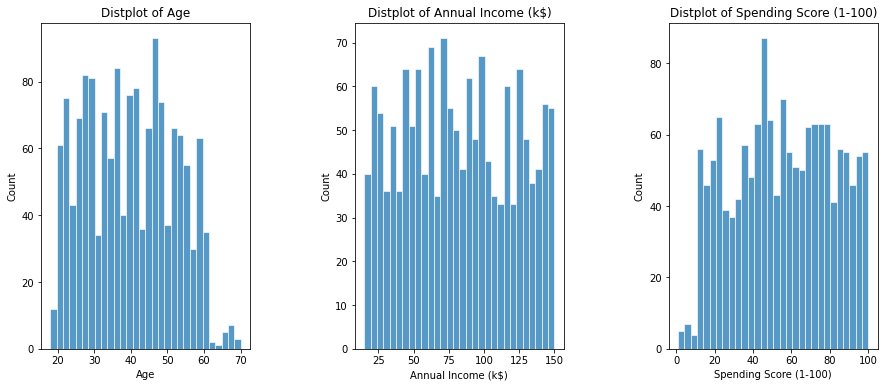

In [7]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 30,edgecolor='white')
    plt.title('Distplot of {}'.format(x))
plt.show()

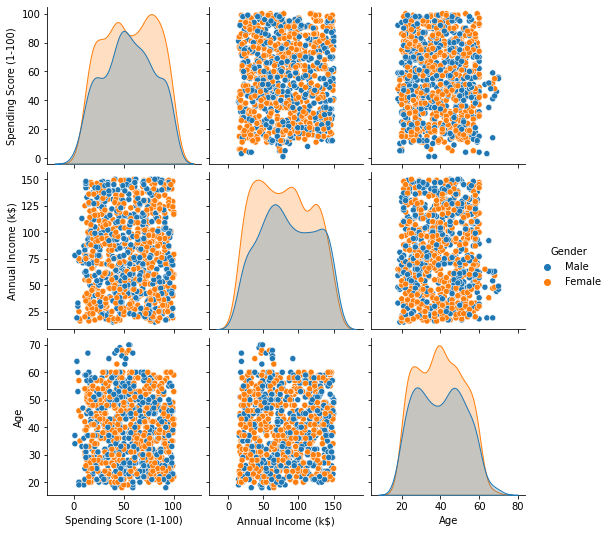

In [8]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

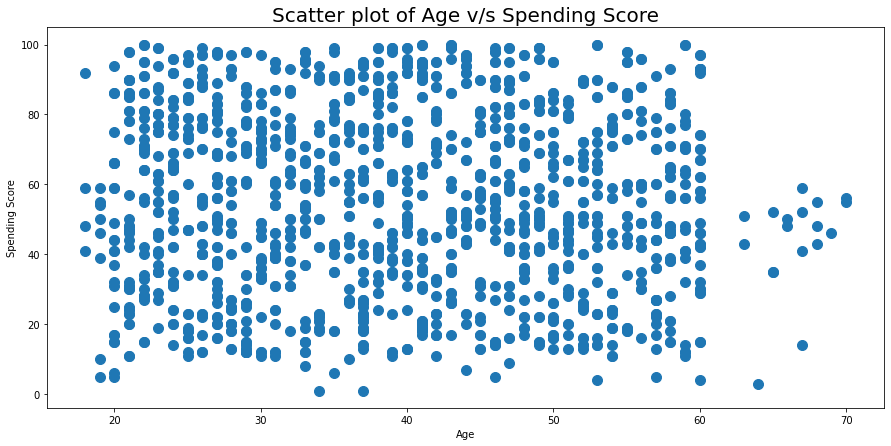

In [9]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

In [10]:
from sklearn.cluster import KMeans

In [11]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

C:\python\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1323: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


In [12]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++' ,random_state= 43 ) )
    algorithm.fit(X1)
   
    inertia.append(algorithm.inertia_)

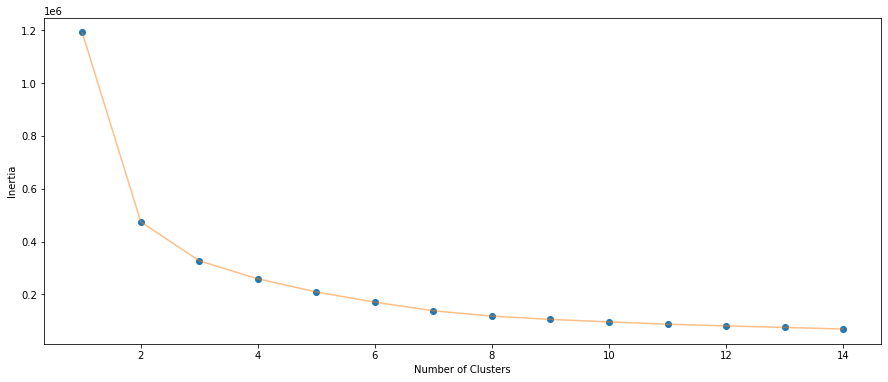

In [13]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [14]:
model1 = (KMeans(n_clusters = 4 ,init='k-means++',  random_state= 43) )
model1.fit(X1)
labels1 = model1.labels_
centroids1 = algorithm.cluster_centers_

In [15]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

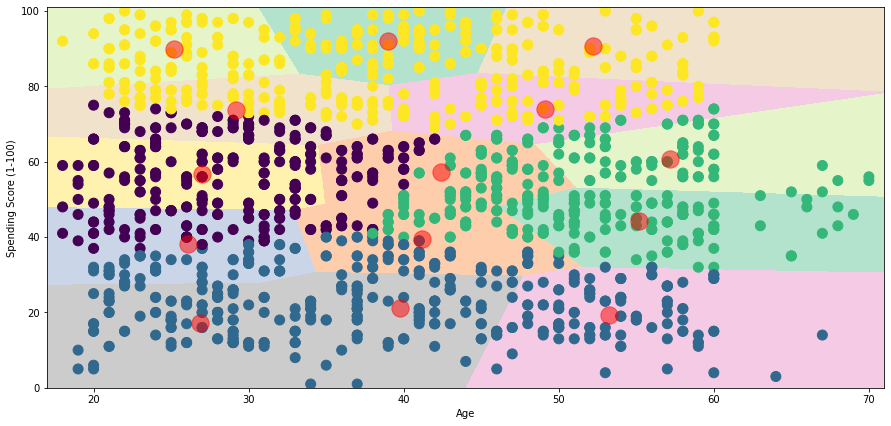

In [16]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [17]:
model2 = (KMeans(n_clusters = 5, init='k-means++', random_state= 43))
model2.fit(X1)
labels1 = model2.labels_
centroids1 = model2.cluster_centers_

In [18]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

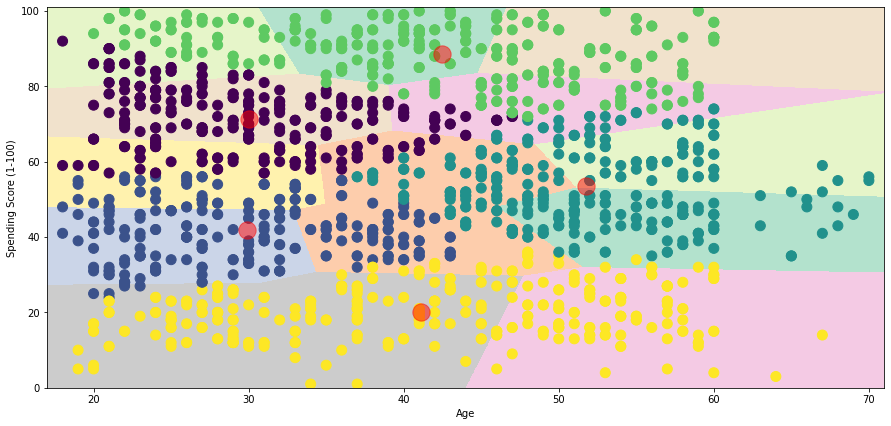

In [19]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [20]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++',  random_state= 43) )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

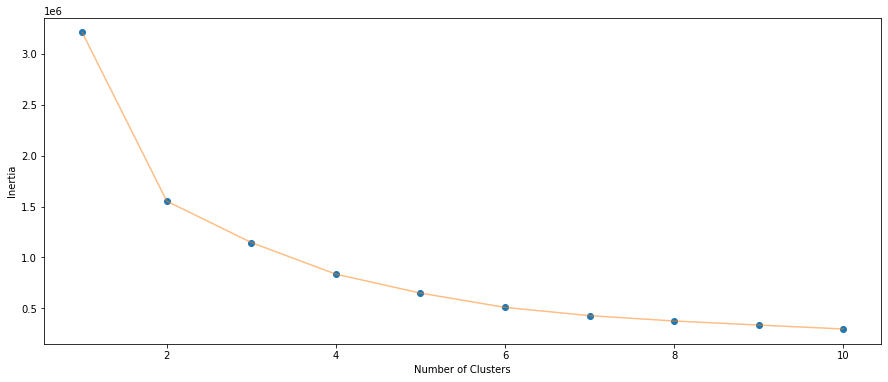

In [21]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


In [22]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', random_state= 43) )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_
h = 0.02

In [23]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

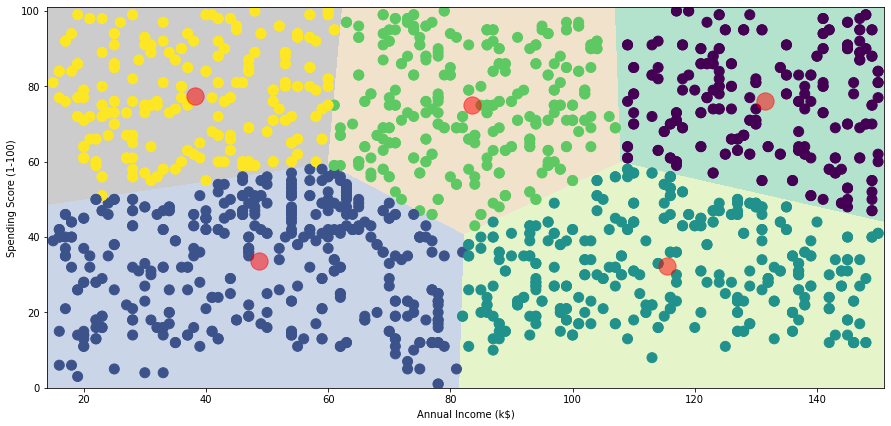

In [24]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [25]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', random_state= 43))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

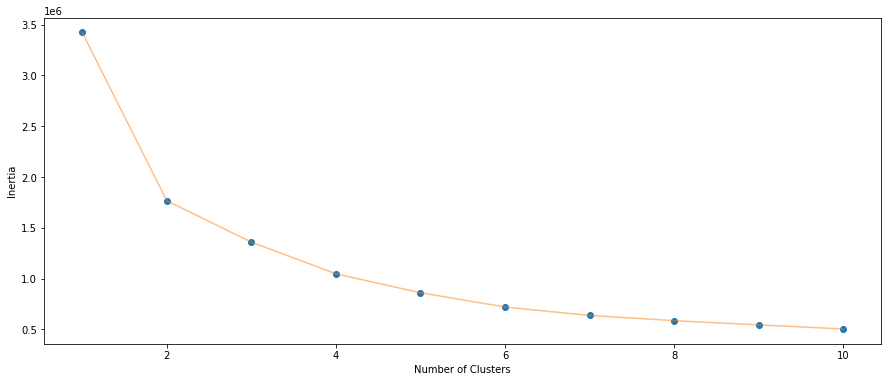

In [26]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [27]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++',  random_state= 43) )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [28]:
y_kmeans = algorithm.fit_predict(X3)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster      Customer rating  
0        1  Low Value Customers  
1        3  High value Customer  
2        1  Low Value Customers  
3        3  High value Customer  
4        1  Low Value Customers

In [29]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
           xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [30]:
df['cluster'].value_counts()

1    281
0    267
3    260
2    248
5    234
4    210
Name: cluster, dtype: int64

In [31]:
df['Customer rating']=np.where(['cluster']==2, "Top Customers" ,(np.where( df['cluster'] ==3, "High value Customer", (np.where( df['cluster'] == 0,  "Medium Value Customer",np.where(df['cluster']== 1,'Low Value Customers', 'Lost Customers'))))))
df.head(5)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster      Customer rating  
0        1  Low Value Customers  
1        3  High value Customer  
2        1  Low Value Customers  
3        3  High value Customer  
4        1  Low Value Customers

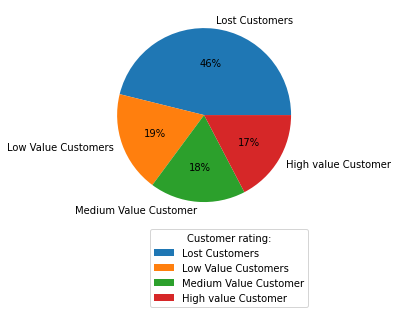

In [32]:
plt.pie(df['Customer rating'].value_counts(),labels=df['Customer rating'].value_counts().index,autopct='%.0f%%')
plt.legend(title = "Customer rating:",loc='upper right',bbox_to_anchor=(1,0))
plt.show()

<BarContainer object of 4 artists>

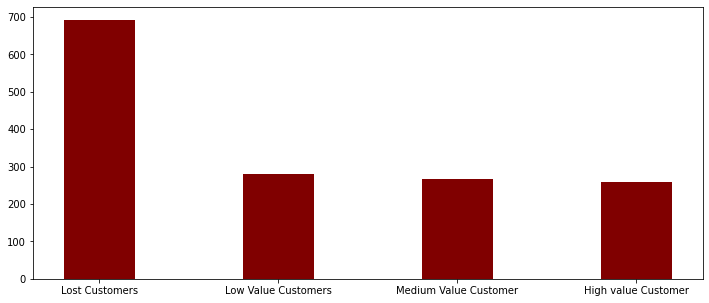

In [33]:
fig = plt.figure(figsize = (12, 5))
plt.bar(df['Customer rating'].value_counts().index, df['Customer rating'].value_counts(), color ='maroon', width = 0.4)

In [34]:
df.to_csv("dataset.csv", index = False)

In [35]:
df


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0              1    Male   19                  15                      39   
1              2    Male   21                  15                      81   
2              3  Female   20                  16                       6   
3              4  Female   23                  16                      77   
4              5  Female   31                  17                      40   
...          ...     ...  ...                 ...                     ...   
1495        1496  Female   32                  25                      38   
1496        1497    Male   33                  34                      47   
1497        1498  Female   39                 122                      86   
1498        1499  Female   46                  28                      47   
1499        1500    Male   65                  92                      35   

      cluster      Customer rating  
0           1  Low Value Customers  
1           3  High value Customer  
2           1  Low Value Customers  
3           3  High value Customer  
4           1  Low Value Customers  
...       ...                  ...  
1495        1  Low Value Customers  
1496        1  Low Value Customers  
1497        4       Lost Customers  
1498        1  Low Value Customers  
1499        5       Lost Customers  

[1500 rows x 7 columns]